In [1]:
import rasterio
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd
from fiona.crs import from_epsg
import pycrs

In [2]:
def getFeatures(gdf):
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [3]:
with rasterio.open("./data/original.tif") as data:
    crs = data.crs
    bounds = data.bounds
    bbox = box(int(bounds.left), int(bounds.bottom), int(bounds.right), int(bounds.top))
    geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=crs)    

In [35]:
width_in_projected_units = bounds.right - bounds.left
width_in_projected_units

1985.598237439699

In [36]:
height_in_projected_units = bounds.top - bounds.bottom
height_in_projected_units

2331.8987422985956

In [4]:
crs

CRS.from_epsg(32632)

In [38]:
int(bounds.right)

318337

In [5]:
bounds

BoundingBox(left=316352.2182256323, bottom=5164376.478371529, right=318337.816463072, top=5166708.3771138275)

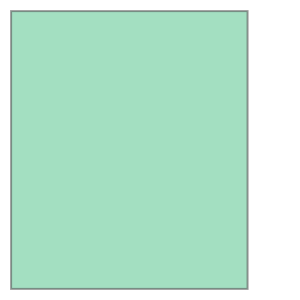

In [6]:
bbox

In [7]:
geo

,geometry
0,"POLYGON ((318337 5164376, 318337 5166708, 3163..."


In [10]:
with rasterio.open("./data/original.tif") as data:
    geo = geo.to_crs(crs=data.crs.data)
    coords = getFeatures(geo)

    out_img, out_transform = mask(dataset=data, shapes=coords, crop=True)

    out_meta = data.meta.copy()
    epsg_code = int(data.crs.data['init'][5:])

    out_meta.update({
        "driver": "GTiff",
        "height": out_img.shape[1],
        "wight": out_img.shape[2],
        "transform": out_transform,
        "crs": pycrs.parse.from_epsg_code(epsg_code).to_proj4()
    })

In [60]:
coords

[{'type': 'Polygon',
  'coordinates': [[[318337.0, 5164376.0],
    [318337.0, 5166708.0],
    [316352.0, 5166708.0],
    [316352.0, 5164376.0],
    [318337.0, 5164376.0]]]}]

In [11]:
out_meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -10000.0,
 'width': 6525,
 'height': 7662,
 'count': 5,
 'crs': '+proj=utm +datum=WGS84 +ellps=WGS84 +a=6378137.0 +rf=298.257223563 +pm=0  +units=m +axis=enu +no_defs',
 'transform': Affine(0.30430624328578065, 0.0, 316352.2182256323,
        0.0, -0.30430624328578065, 5166708.072807584),
 'wight': 6523}

In [63]:
out_transform

Affine(0.30430624328578065, 0.0, 316352.2182256323,
       0.0, -0.30430624328578065, 5166708.072807584)

In [64]:
epsg_code

32632

In [12]:
with rasterio.open("./data/clipped.tif", "w", **out_meta) as dest:
    dest.write(out_img)

In [15]:
from matplotlib import pyplot as plt

In [26]:
out_img[0]

array([[-10000., -10000., -10000., ..., -10000., -10000., -10000.],
       [-10000., -10000., -10000., ..., -10000., -10000., -10000.],
       [-10000., -10000., -10000., ..., -10000., -10000., -10000.],
       ...,
       [-10000., -10000., -10000., ..., -10000., -10000., -10000.],
       [-10000., -10000., -10000., ..., -10000., -10000., -10000.],
       [-10000., -10000., -10000., ..., -10000., -10000., -10000.]],
      dtype=float32)

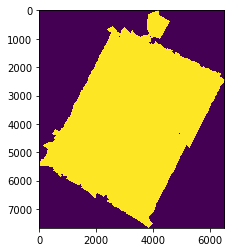

In [61]:
fig = plt.imshow(out_img[0])